Импортируем нужные библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загружаем данные из файла

In [2]:
transactions_train = pd.read_csv('transactions_train.csv')

Группируем данные таким образом, чтобы получить количество покупок каждой категории за каждый день

In [3]:
group_sum_for_each_day = transactions_train.groupby(['trans_date','small_group'])['amount'].sum()
group_count_for_each_day = transactions_train.groupby(['trans_date','small_group'])['amount'].count()

In [4]:
category_sums = group_sum_for_each_day.reset_index().pivot(index='trans_date', \
                                                      columns='small_group',values='amount').fillna(0)
category_counts = group_count_for_each_day.reset_index().pivot(index='trans_date', \
                                                      columns='small_group',values='amount').fillna(0)

In [5]:
category_counts.columns = ['small_group_' + str(i) for i in category_counts.columns]
category_sums.columns = ['small_group_' + str(i) for i in category_sums.columns]

Можно посмотреть на разные категории и увидеть корреляции между бытовыми датами и покупками в этот период

Например, Категория 37 - Цветы и флористика, пики покупок выпадают на 14 февраля, 8 марта и 1 сентября, так можно получить примерные даты транзакций 

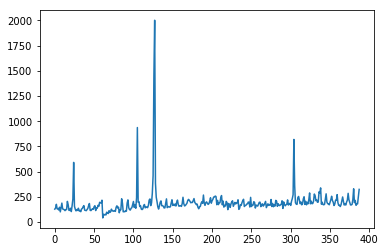

In [6]:
plt.plot(category_counts['small_group_37']);

Пик потраченных денег на билеты на матчи (Категория 81 - Билеты на спортивные матчи, спортивные клубы и фитнес-центры) выпали на начало лета скорее всего перед ЧМ

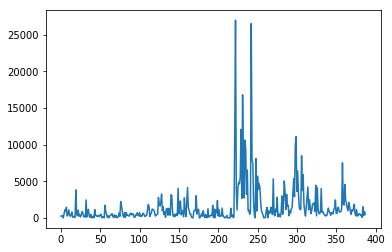

In [7]:
plt.plot(category_sums['small_group_81']);

А вот количество было наибольшим в конце августа

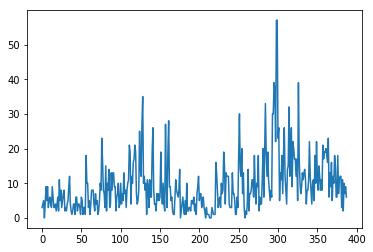

In [8]:
plt.plot(category_counts['small_group_81']);

Пик алкоголя(Категория 18 - Алкогольный магазин) был перед Новым Годом

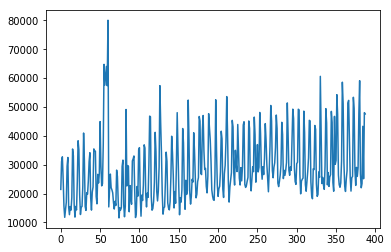

In [9]:
plt.plot(category_sums['small_group_18']);

Были выдвинуты гипотезы связанные с романтичностью людей и их интересом к матчам:

1) Если они покупали цветы на 8е марта - скорее всего они чаще ходят в кино и театры

2) Если они ходили на самый популярный матч - скорее всего они чаще ходят на матчи вообще

3) И возможно есть скрытые корреляции, например, если они покупали определенные виды товаров в эти периоды, значит интереса к каким-то группам у них меньше или больше